#Loading and merging data sets using UCI ML repository

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from urllib.request import urlopen
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import entropy
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [6]:
# Load datasets into dataframes
df1 = pd.read_csv("spotify_tracks1.csv")
df2 = pd.read_csv("test.csv")

# Merge datasets
merged_df = pd.merge(df1, df2, on='popularity')  # Replace 'common_column' with the actual common column name

# Optionally, handle missing data
# merged_df = merged_df.dropna()  # Example: drop rows with NaN values

# Print merged dataframe or do further analysis
print(merged_df.head())

   Unnamed: 0_x              track_id_x     artists_x album_name_x  \
0             0  5ieA3sRjDvak7oTrbrR6mV  Frank Turner     Songbook   
1             0  5ieA3sRjDvak7oTrbrR6mV  Frank Turner     Songbook   
2             0  5ieA3sRjDvak7oTrbrR6mV  Frank Turner     Songbook   
3             0  5ieA3sRjDvak7oTrbrR6mV  Frank Turner     Songbook   
4             0  5ieA3sRjDvak7oTrbrR6mV  Frank Turner     Songbook   

        track_name_x  popularity  duration_ms_x  explicit_x  danceability_x  \
0  Four Simple Words          25         297093        True           0.335   
1  Four Simple Words          25         297093        True           0.335   
2  Four Simple Words          25         297093        True           0.335   
3  Four Simple Words          25         297093        True           0.335   
4  Four Simple Words          25         297093        True           0.335   

   energy_x  ...  loudness_y  mode_y  speechiness_y  acousticness_y  \
0     0.881  ...     -12.119     

In [7]:
merged_df.filter(["name","genre","artists","album","Popularity","duration_ms","explicit","Artist Name","Track Name","loudness","mode","speechiness","acousticness",
                  "instrumentalness","liveness","valence","tempo","duration_in min/ms","time_signature"])

""
0
1
2
3
4
...
2286327
2286328
2286329
2286330


In [8]:
rows = merged_df.sample(frac =.00001)
rows

,Unnamed: 0_x,track_id_x,artists_x,album_name_x,track_name_x,popularity,duration_ms_x,explicit_x,danceability_x,energy_x,...,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,time_signature_y,track_genre_y
2161010,106036,22MstiHv8RQFPMKyG8Ke9f,Icona Pop;Just Kiddin,Dance Dance Dance,Brightside - Just Kiddin Remix,0,306463,False,0.817,0.630000,...,-8.192,1,0.0388,0.3660,0.000000,0.0914,0.564,202.019,4,acoustic
289614,15194,4FcMVYbK3QvacUKVCZYusj,Pyotr Ilyich Tchaikovsky;Boston Symphony Orche...,Weihnachten Klassik 2022,"The Nutcracker, Op. 71, TH.14 / Act 1: No. 2 M...",0,145013,False,0.615,0.194000,...,-5.873,1,0.0296,0.3680,0.000017,0.1560,0.186,98.995,4,acoustic
908349,46331,6Nd6ntkzr4t8o1FKPGOSMt,Whitesnake,Whitesnake (2018 Remaster),Here I Go Again - 2018 Remaster,69,275395,False,0.292,0.823000,...,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,3,acoustic
893370,45098,5yNn7FM82L2iaTQY0qkCF0,Neophyte,Harder Tunes Forever - 100% the Best in Hardst...,Strictly Underground,0,135529,False,0.663,0.992000,...,-9.421,1,0.0505,0.3240,0.000055,0.0867,0.621,93.269,1,acoustic
978943,50700,7mhJ08BCG6goQ8mPpk9TuZ,Anirudh Ravichander;Sunidhi Chauhan;Sanjana Ka...,Kaathuvaakula Rendu Kaadhal (Original Motion P...,Two Two Two,57,176345,False,0.837,0.691000,...,-8.994,0,0.0304,0.7460,0.000000,0.1310,0.294,116.004,4,acoustic
2071350,102179,4Ve2rEC6QHuhjf2D2t1CW4,Surfaces,Pop Fun and Christmas Music 2022,Take It Easy,0,212849,False,0.764,0.690000,...,-11.799,1,0.0412,0.7820,0.000225,0.0959,0.202,165.400,4,acoustic
320674,17033,2M3K38uN5Y7NIut1k0zqfF,Jim Norton,Despicable,Fuck Florida,31,72373,True,0.585,0.662000,...,-7.065,0,0.0295,0.1400,0.019400,0.1930,0.670,144.901,4,acoustic
2121027,103774,1dp62fHaXUP0Zh45voegpI,Melendi,Lágrimas desordenadas,Lágrimas desordenadas,60,229308,False,0.641,0.937000,...,-13.778,1,0.0368,0.8880,0.000382,0.1090,0.120,141.988,3,acoustic
708268,35691,2A6DhFsTv4TRNNG7ua7pbt,Renaud,Renaud (Deluxe Version),Héloïse,32,131786,False,0.561,0.527000,...,-6.630,1,0.0309,0.2010,0.000030,0.0802,0.871,111.664,4,acoustic
654662,32850,3QNhN2XUA84slgbYjqvG8l,Reznik,Strangulační Rýha,Potřebujem Další Válku,34,150486,True,0.776,0.697000,...,-14.957,0,0.1010,0.9820,0.954000,0.1060,0.338,119.998,4,acoustic


#data cleaning

In [10]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('Iris.csv', header=0, names=columns)

print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

df.drop_duplicates(inplace=True)

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

scaler = StandardScaler()
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df[num_cols] = scaler.fit_transform(df[num_cols])

print("\nCleaned Data:")
print(df.head())


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Duplicates: 3

Cleaned Data:
   sepal_length  sepal_width  petal_length  petal_width  class
1     -0.915509     1.019971     -1.357737      -1.3357      0
2     -1.157560    -0.128082     -1.357737      -1.3357      0
3     -1.399610     0.331139     -1.414778      -1.3357      0
4     -1.520635     0.101529     -1.300696      -1.3357      0
5     -1.036535     1.249582     -1.357737      -1.3357      0


#Applying encoding techniques

In [12]:
df = pd.read_csv('student_mark.csv')

In [13]:
one_hot_encoding = pd.get_dummies(df,columns=['Marks'])
one_hot_encoding

,Name,Gender,DOB,Marks_25,Marks_45,Marks_54,Marks_55,Marks_58,Marks_75,Marks_78,Marks_96
0,John,M,05-04-1988,False,False,False,True,False,False,False,False
1,Suresh,M,04-05-1987,False,False,False,False,False,True,False,False
2,Ramesh,M,25-05-1989,True,False,False,False,False,False,False,False
3,Jessica,F,12-08-1990,False,False,False,False,False,False,True,False
4,Jennifer,F,02-09-1989,False,False,False,False,True,False,False,False
5,Annu,F,05-04-1988,False,True,False,False,False,False,False,False
6,pooja,F,04-05-1987,False,False,False,True,False,False,False,False
7,Ritesh,M,25-05-1989,False,False,True,False,False,False,False,False
8,Farha,F,12-08-1990,False,False,False,True,False,False,False,False
9,Mukesh,M,02-09-1989,False,False,False,False,False,False,False,True


In [14]:
label_encoder = LabelEncoder()
df['encoded_name'] = label_encoder.fit_transform(df['Name'])
df

,Name,Gender,DOB,Marks,encoded_name
0,John,M,05-04-1988,55,4
1,Suresh,M,04-05-1987,75,8
2,Ramesh,M,25-05-1989,25,6
3,Jessica,F,12-08-1990,78,3
4,Jennifer,F,02-09-1989,58,2
5,Annu,F,05-04-1988,45,0
6,pooja,F,04-05-1987,55,9
7,Ritesh,M,25-05-1989,54,7
8,Farha,F,12-08-1990,55,1
9,Mukesh,M,02-09-1989,96,5


In [15]:
sizes = pd.DataFrame({
    'Size': ['Small', 'Large', 'Medium', 'Large', 'Small']
})

categories = [['Small', 'Medium', 'Large']]

ordinal_encoder = OrdinalEncoder(categories=categories)
sizes['Size_encoded'] = ordinal_encoder.fit_transform(sizes[['Size']])
sizes

,Size,Size_encoded
0,Small,0.0
1,Large,2.0
2,Medium,1.0
3,Large,2.0
4,Small,0.0


In [16]:
count_encoding = sizes['Size'].value_counts()
sizes['size_encode'] = sizes['Size'].map(count_encoding)
sizes

,Size,Size_encoded,size_encode
0,Small,0.0,2
1,Large,2.0,2
2,Medium,1.0,1
3,Large,2.0,2
4,Small,0.0,2


In [17]:
df_dict = df.to_dict(orient='records')
hasher = FeatureHasher(n_features=3, input_type='dict')
df_hashing = hasher.fit_transform(df_dict).toarray()
df_hashing

array([[ -2.,   5., -55.],
       [ -1.,   8., -75.],
       [ -1.,   6., -25.],
       [  1.,   2., -79.],
       [  0.,   3., -58.],
       [ -1.,   0., -45.],
       [  0.,   8., -55.],
       [  0.,   8., -54.],
       [  0.,   0., -57.],
       [  0.,   6., -96.]])

#Normalizing, scaling, balancing data

In [20]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
columns = ["Class", "Alcohol", "Malic Acid", "Ash", "Alcalinity of Ash", "Magnesium",
           "Total Phenols", "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins",
           "Color Intensity", "Hue", "OD280/OD315", "Proline"]

df = pd.read_csv(url, names=columns)

print("Original Dataset Shape:", df.shape)
print(df.head())

X = df.drop(columns=["Class"])
y = df["Class"]

X.fillna(X.mean(), inplace=True)  # Fill missing values with column mean

minmax_scaler = MinMaxScaler()
X_normalized = minmax_scaler.fit_transform(X)

standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nBalanced Training Set Shape:", X_train_balanced.shape)
print("Class Distribution Before SMOTE:\n", y_train.value_counts())
print("Class Distribution After SMOTE:\n", pd.Series(y_train_balanced).value_counts())

Original Dataset Shape: (178, 14)
   Class  Alcohol  Malic Acid   Ash  Alcalinity of Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total Phenols  Flavanoids  Nonflavanoid Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color Intensity   Hue  OD280/OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05  

#Data Visualization using Matplotlib library part-1

In [22]:
df = pd.read_csv('mtcars.csv')

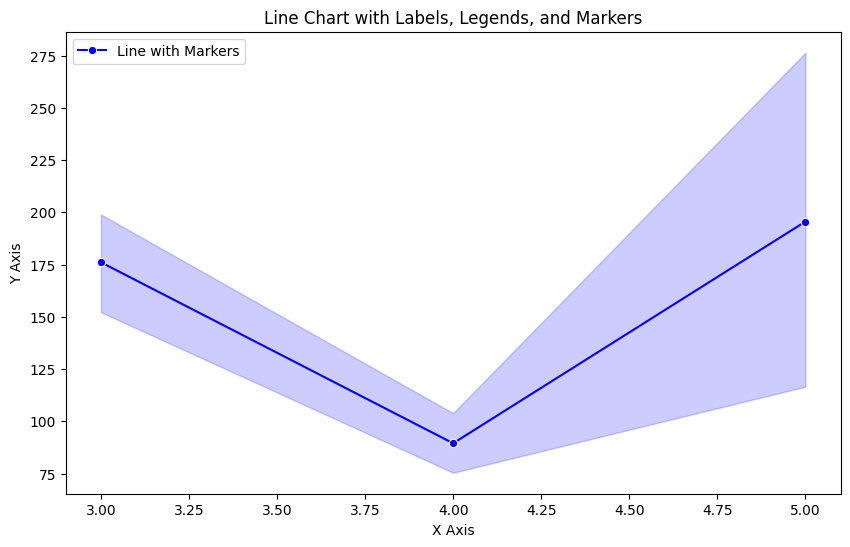

In [23]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['gear'], y=df['hp'], data=df, marker='o', label='Line with Markers', color='blue')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Line Chart with Labels, Legends, and Markers')
plt.legend()

plt.show()

<ipython-input-24-bbb73425574b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['mpg'], data=df, palette='viridis')


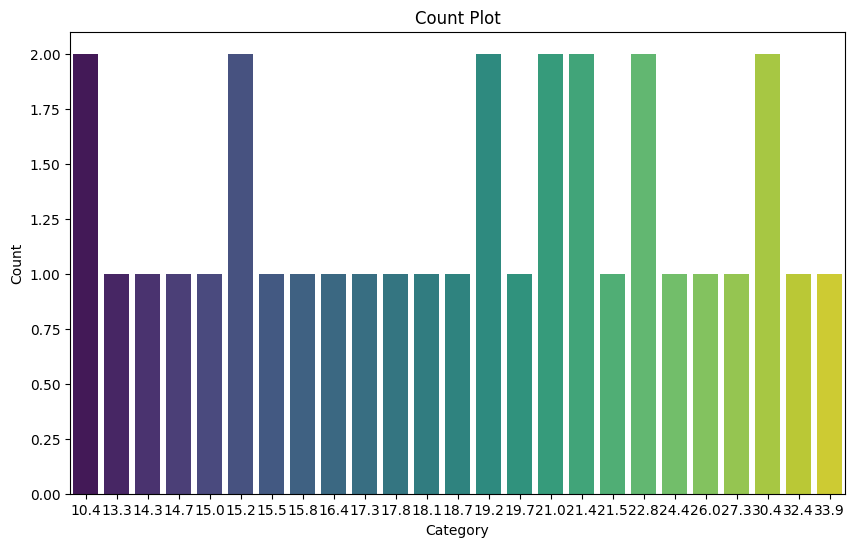

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['mpg'], data=df, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count Plot')

plt.show()

#Data Visualization using Matplotlib library part-2

<ipython-input-25-1110977bffc3>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x= df['mpg'], y=df['hp'], palette='viridis', data=df)


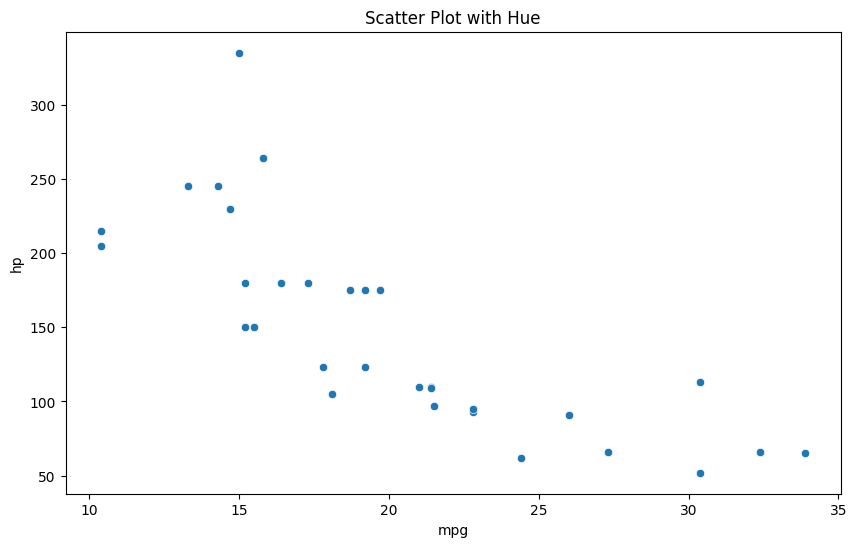

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x= df['mpg'], y=df['hp'], palette='viridis', data=df)
plt.title('Scatter Plot with Hue')
plt.show()

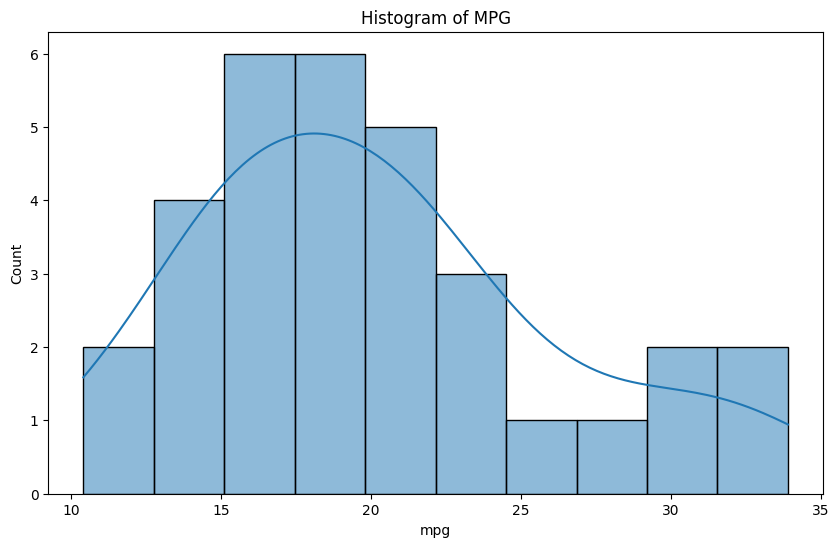

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['mpg'], bins=10, kde=True)
plt.title('Histogram of MPG')
plt.show()

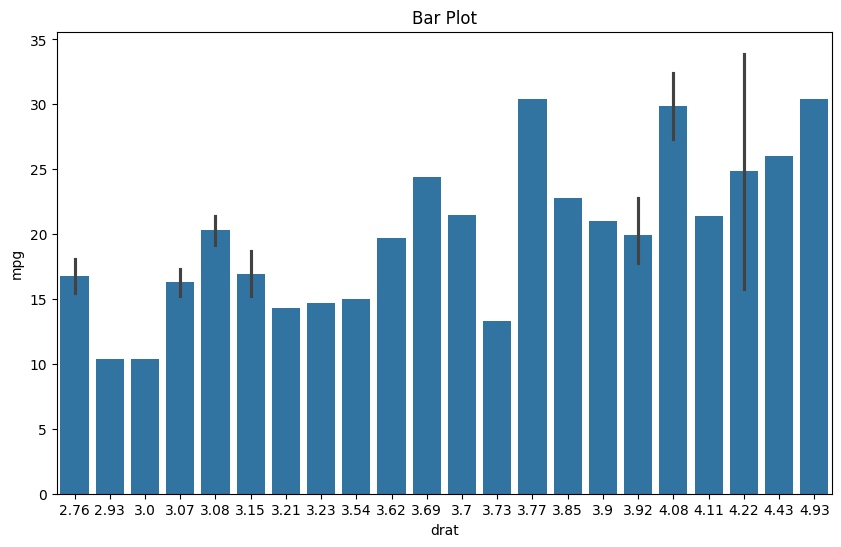

In [27]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df['drat'], y=df['mpg'], data=df)
plt.title('Bar Plot')
plt.show()

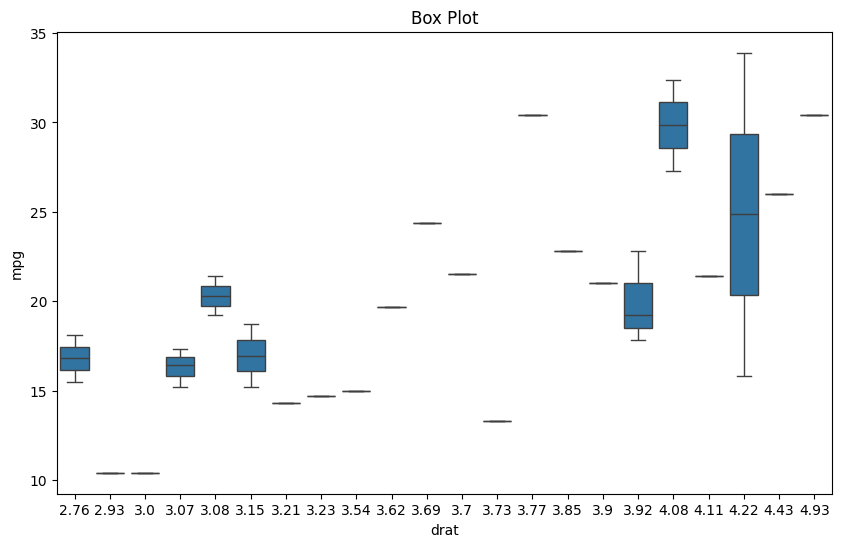

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['drat'], y=df['mpg'], data=df)
plt.title('Box Plot')
plt.show()

#Apply filter feature selection techniques part-1

In [30]:
X = df[['mpg', 'cyl']]
y = df['hp']
info_gain = mutual_info_classif(X, y)
print(info_gain)

[1.29837605 1.35734404]


In [31]:
chi_scores, p_values = chi2(X, y)
print(chi_scores)
print(p_values)

[55.18447141 15.54882155]
[6.64456551e-05 7.94441298e-01]


In [32]:
y = df['vs']
values, counts = np.unique(y, return_counts=True)
probabilities = counts / len(y)
ent = entropy(probabilities, base=2)
print(f"Entropy: {ent*100}%")

Entropy: 98.86994082884975%


In [33]:
# Features (X) and target (y)
X = df[['mpg', 'cyl']].values
y = df['vs'].values

In [34]:
# Calculating parent Entropy (S)
values, counts = np.unique(y, return_counts=True)
parent_entropy = entropy(counts / len(y), base=2)
print(f"Parent Entropy: {parent_entropy*100}%")

Parent Entropy: 98.86994082884975%


In [35]:
X_feature = X[:, 0]

# 2. Split Data Based on Feature X
median_value = np.median(X_feature)

# Subsets for X_feature <= median and X_feature > median
y_left = y[X_feature <= median_value]
y_right = y[X_feature > median_value]

# Calculate the entropy of subsets
values_left, counts_left = np.unique(y_left, return_counts=True)
entropy_left = entropy(counts_left / len(y_left), base=2)

values_right, counts_right = np.unique(y_right, return_counts=True)
entropy_right = entropy(counts_right / len(y_right), base=2)

print(f"Entropy Left (<= median): {entropy_left}")
print(f"Entropy Right (> median): {entropy_right}")

# Subset sizes
left_weight = len(y_left) / len(y)
right_weight = len(y_right) / len(y)

Entropy Left (<= median): 0.672294817075638
Entropy Right (> median): 0.8366407419411673


In [36]:
# Information Gain
info_gain = parent_entropy - (left_weight * entropy_left + right_weight * entropy_right)
print(f"Information Gain: {info_gain}")

Information Gain: 0.23936743893214252


#Apply filter feature selection techniques part-2

In [38]:
X = df[['mpg', 'hp', 'wt']]
y = df['am']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



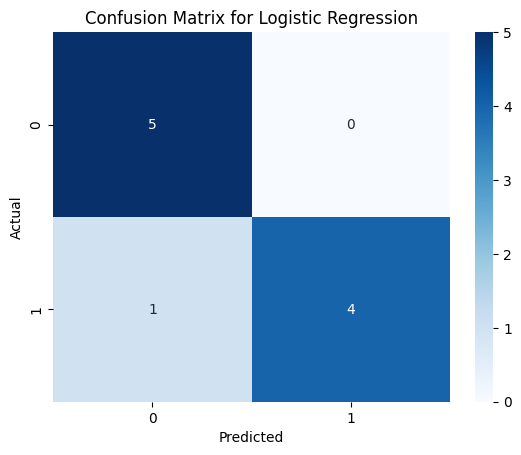

In [40]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_conf_matrix = confusion_matrix(y_test, y_pred_logistic)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logistic))
sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



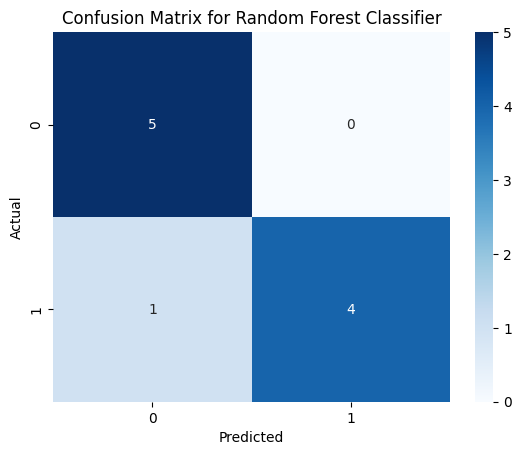

In [41]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



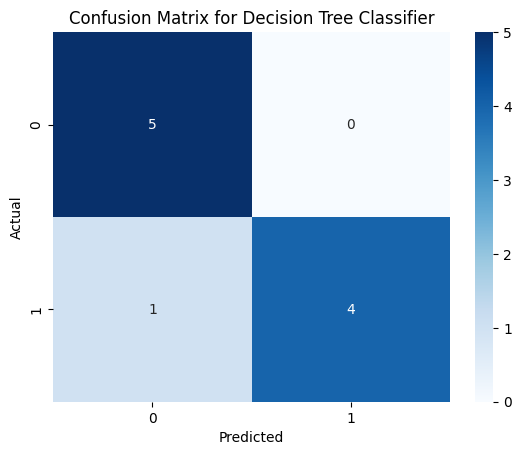

In [42]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Apply wrapper feature selection technique part-1

In [46]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(max_iter=200)

In [47]:
sbs = SFS(clf,
k_features=3,
forward=False,
floating=False,
scoring='accuracy',
cv=5)
sbs = sbs.fit(X_train, y_train)

In [48]:
selected_features = sbs.k_feature_idx_
print(f"Selected Features: {selected_features}")

X_train_sbs = sbs.transform(X_train)
X_test_sbs = sbs.transform(X_test)

clf.fit(X_train_sbs, y_train)

y_pred = clf.predict(X_test_sbs)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy with selected features: {accuracy*100}%")

Selected Features: (0, 2, 3)
Model accuracy with selected features: 100.0%


#Apply wrapper feature selection technique part-2

In [50]:
boston = fetch_california_housing()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
lasso = Lasso(alpha=0.1) # The regularization strength is controlled by alpha
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.1)

In [54]:
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)

In [55]:
selected_features = lasso_coefficients[lasso_coefficients != 0]
print(f"Selected Features by Lasso: \n{selected_features}")

Selected Features by Lasso: 
MedInc      0.710598
HouseAge    0.106453
Latitude   -0.011469
dtype: float64


In [56]:
lasso_test_score = lasso.score(X_test_scaled, y_test)
print(f"Model performance with selected features (R^2 score): {lasso_test_score}")

Model performance with selected features (R^2 score): 0.48136113250290735


Feature Importances by Random Forest:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


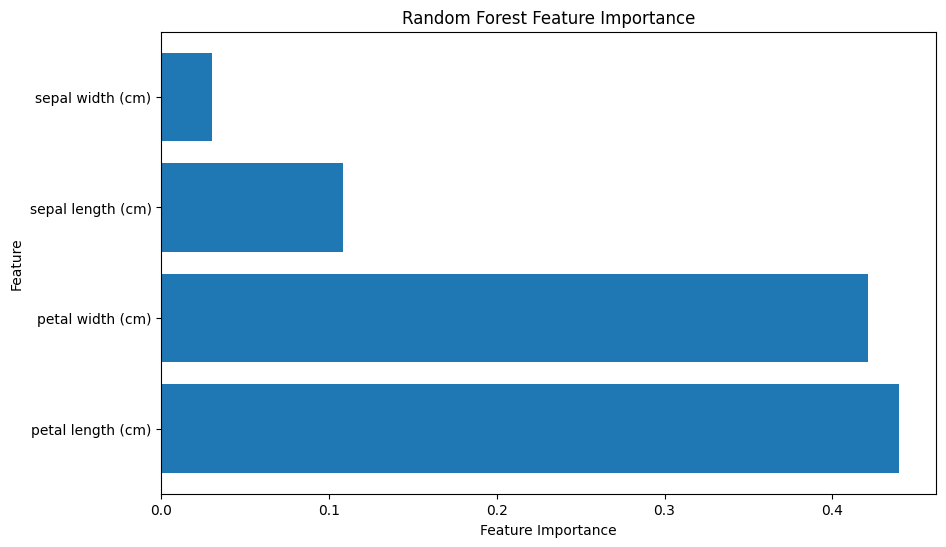

In [57]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Load dataset (Iris dataset)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importances from the model
importances = rf.feature_importances_
feature_names = X.columns
# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Print selected features
print("Feature Importances by Random Forest:")
print(feature_importance_df)
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

#Embedded feature selection techniques

In [58]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]
wine_df = pd.read_csv(url, header=None, names=columns)

X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
lasso_coefficients = pd.Series(lasso.coef_, index=X.columns)
selected_lasso_features = lasso_coefficients[lasso_coefficients != 0].index
print("Selected Features by Lasso:")
print(selected_lasso_features)

X_train_lasso = X_train_scaled[:, lasso_coefficients != 0]
X_test_lasso = X_test_scaled[:, lasso_coefficients != 0]

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_lasso, y_train)
y_pred_rf = rf_classifier.predict(X_test_lasso)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Model Accuracy with Selected Features: {rf_accuracy:.4f}\n")

Selected Features by Lasso:
Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Total_phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Color_intensity', 'Hue',
       'OD280/OD315', 'Proline'],
      dtype='object')

Random Forest Model Accuracy with Selected Features: 1.0000



In [60]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]
wine_df = pd.read_csv(url, header=None, names=columns)

X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.5)
elasticnet.fit(X_train_scaled, y_train)
elasticnet_coefficients = pd.Series(elasticnet.coef_, index=X.columns)
selected_elasticnet_features = elasticnet_coefficients[elasticnet_coefficients != 0].index
print("Selected Features by ElasticNet:")
print(selected_elasticnet_features)

X_train_elasticnet = X_train_scaled[:, elasticnet_coefficients != 0]
X_test_elasticnet = X_test_scaled[:, elasticnet_coefficients != 0]

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_elasticnet, y_train)
y_pred_rf = rf_classifier.predict(X_test_elasticnet)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Model Accuracy with Selected Features: {rf_accuracy:.4f}\n")

Selected Features by ElasticNet:
Index(['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Total_phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
       'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'],
      dtype='object')

Random Forest Model Accuracy with Selected Features: 1.0000



Random Forest Model Accuracy: 1.0000


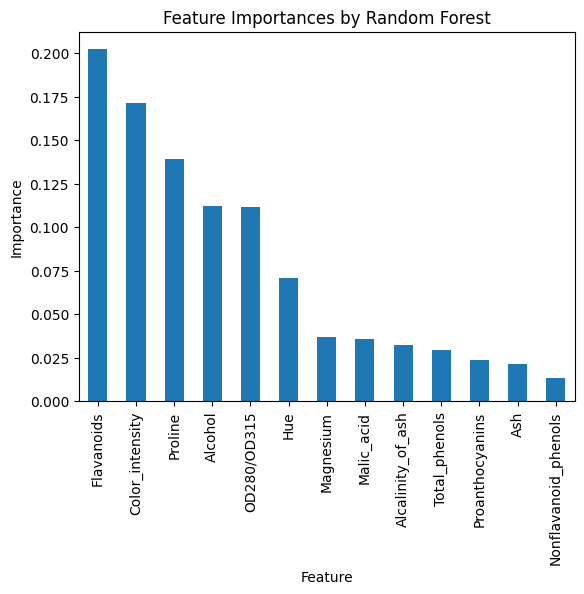

In [61]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
columns = [
    'Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
    'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
    'Color_intensity', 'Hue', 'OD280/OD315', 'Proline'
]
wine_df = pd.read_csv(url, header=None, names=columns)

X = wine_df.iloc[:, 1:]
y = wine_df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")

feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances by Random Forest')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.show()

#Using different ML supervised classifiers

In [63]:
# Load text data
data = fetch_20newsgroups(subset='train')
X, y = data.data, data.target
# Convert text to feature vectors
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3)
# Train Naive Bayes Classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)
# Evaluate model
accuracy = nb.score(X_test, y_test)
print(f"Naive Bayes Accuracy: {accuracy:.4f}")

Naive Bayes Accuracy: 0.8062


In [64]:
# Load dataset
wine = load_wine()
X, y = wine.data, wine.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3)
# Train Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Evaluate model
accuracy = rf.score(X_test, y_test)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9630


In [65]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3)
# Train Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# Evaluate model
accuracy = dt.score(X_test, y_test)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.9556


In [66]:
# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3)
# Train SVM Classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
# Evaluate model
accuracy = svm.score(X_test, y_test)
print(f"SVM Accuracy: {accuracy:.4f}")

SVM Accuracy: 0.9649


In [67]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3)
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# Evaluate model
accuracy = knn.score(X_test, y_test)
print(f"KNN Accuracy: {accuracy:.4f}")

KNN Accuracy: 0.9778


In [68]:
# Load dataset
wine = load_wine()
X, y = wine.data, wine.target
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3)
# Train XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
# Evaluate model
accuracy = xgb.score(X_test, y_test)
print(f"XGBoost Accuracy: {accuracy:.4f}")

XGBoost Accuracy: 0.9630


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:03:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [69]:
# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train AdaBoost Classifier
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
ada.fit(X_train, y_train)

# Evaluate model
accuracy = ada.score(X_test, y_test)